<a href="https://colab.research.google.com/github/akmal1994/Bike-Rental-count/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone Projects/Supervised ML - Regression/SeoulBikeData.csv',encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [16]:
data = df.copy()

# Basic EDA

In [17]:
data.shape

(8760, 14)

In [18]:
# checking column types of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [19]:
# Converting date column into DateTime
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [20]:
# Segregate year, month, day from datetime columns
data['date_year'] = data['Date'].dt.year
data['date_month'] = data['Date'].dt.month
data['date_day'] = data['Date'].dt.day
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,date_year,date_month,date_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


In [21]:
# drop date column
data.drop('Date',axis=1, inplace=True)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,date_year,date_month,date_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


In [22]:
# checking for null values
data.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
date_year                    0
date_month                   0
date_day                     0
dtype: int64

In [23]:
# to check the number of unique values of each column
data.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
date_year                       2
date_month                     12
date_day                       31
dtype: int64

In [24]:
data.Hour.value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

In [25]:
#data.drop('Hour', axis=1, inplace=True)

## Descriptive Statistics

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**Observations:**
- From the observation we can say that minimum values for rented_bike_count is zero, which means possibly there is 

In [27]:
# Renaming columns
data.rename({'Rented Bike Count': 'rented_bike_count', 'Snowfall (cm)':'snowfall'}, axis=1, inplace=True)
data.columns

Index(['rented_bike_count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'snowfall', 'Seasons',
       'Holiday', 'Functioning Day', 'date_year', 'date_month', 'date_day'],
      dtype='object')

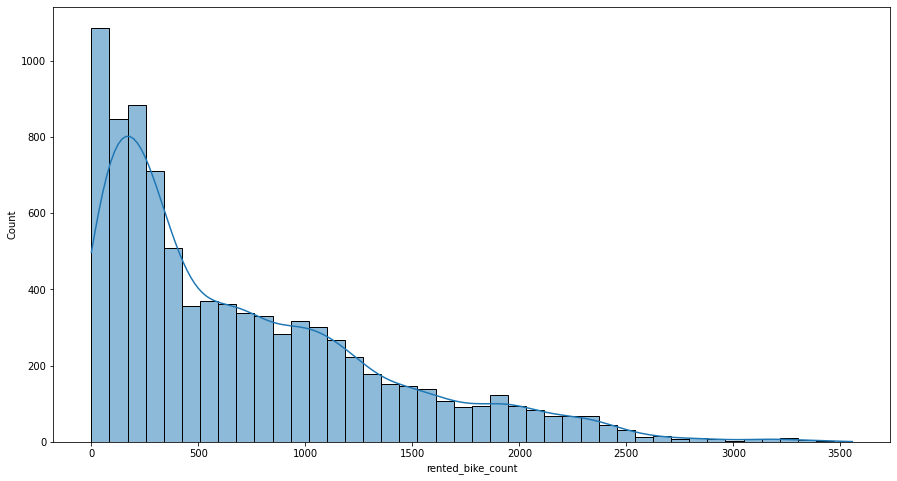

In [28]:
# To check the rented count distribution
plt.figure(figsize=(15,8))
sns.histplot(data['rented_bike_count'], kde=True)

In [29]:
cont_cols = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','snowfall']

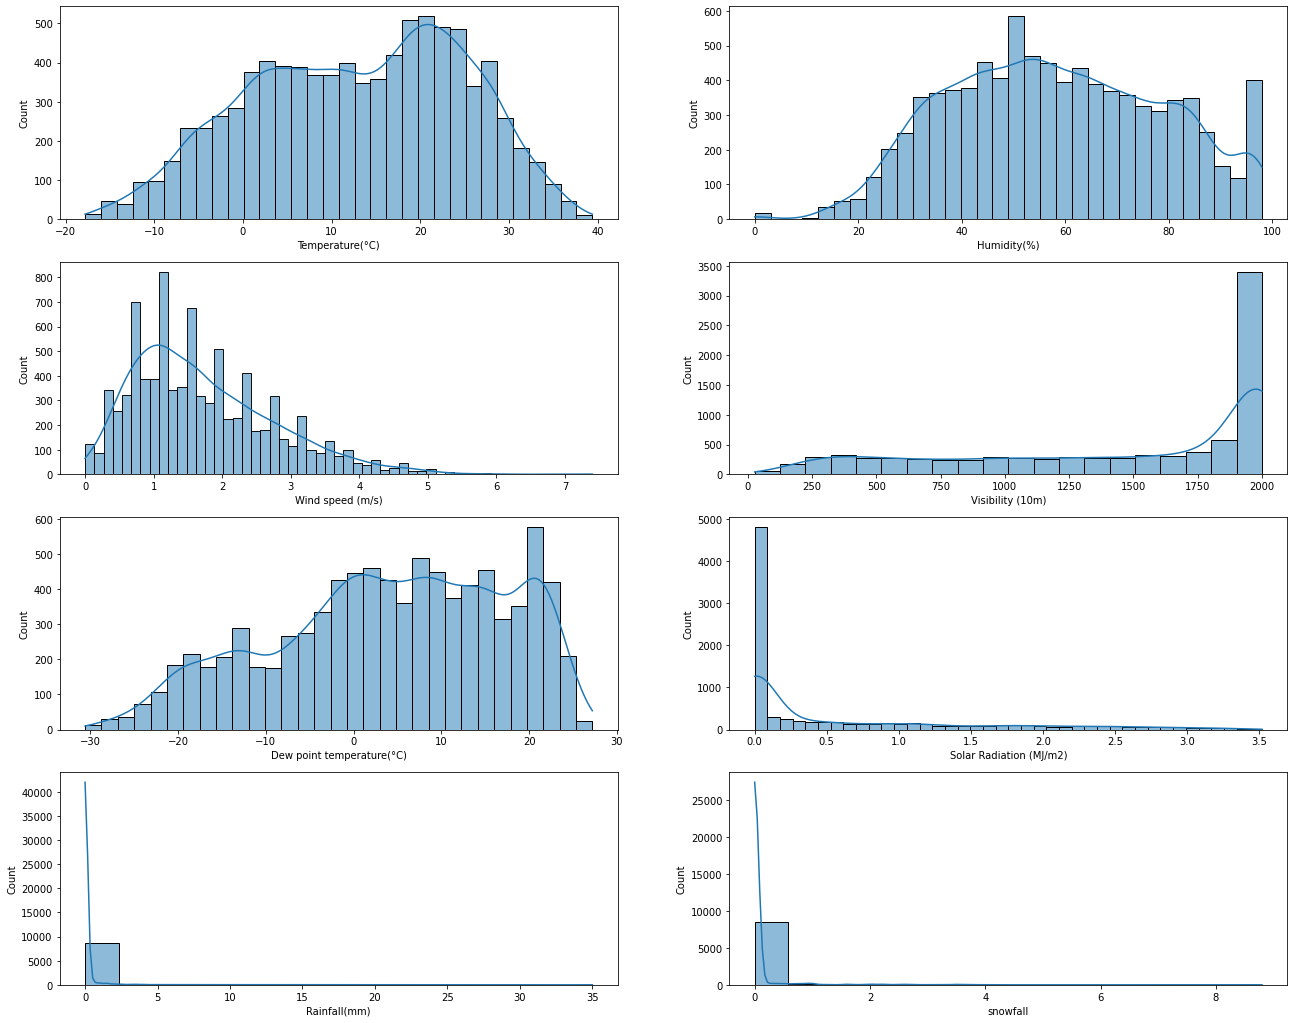

In [30]:
# Plot graph to see the distribution

plt.figure(figsize=(22,18))

for num,col in enumerate(cont_cols):
    plt.subplot(4,2,num+1)
    sns.histplot(data[col], kde=True)

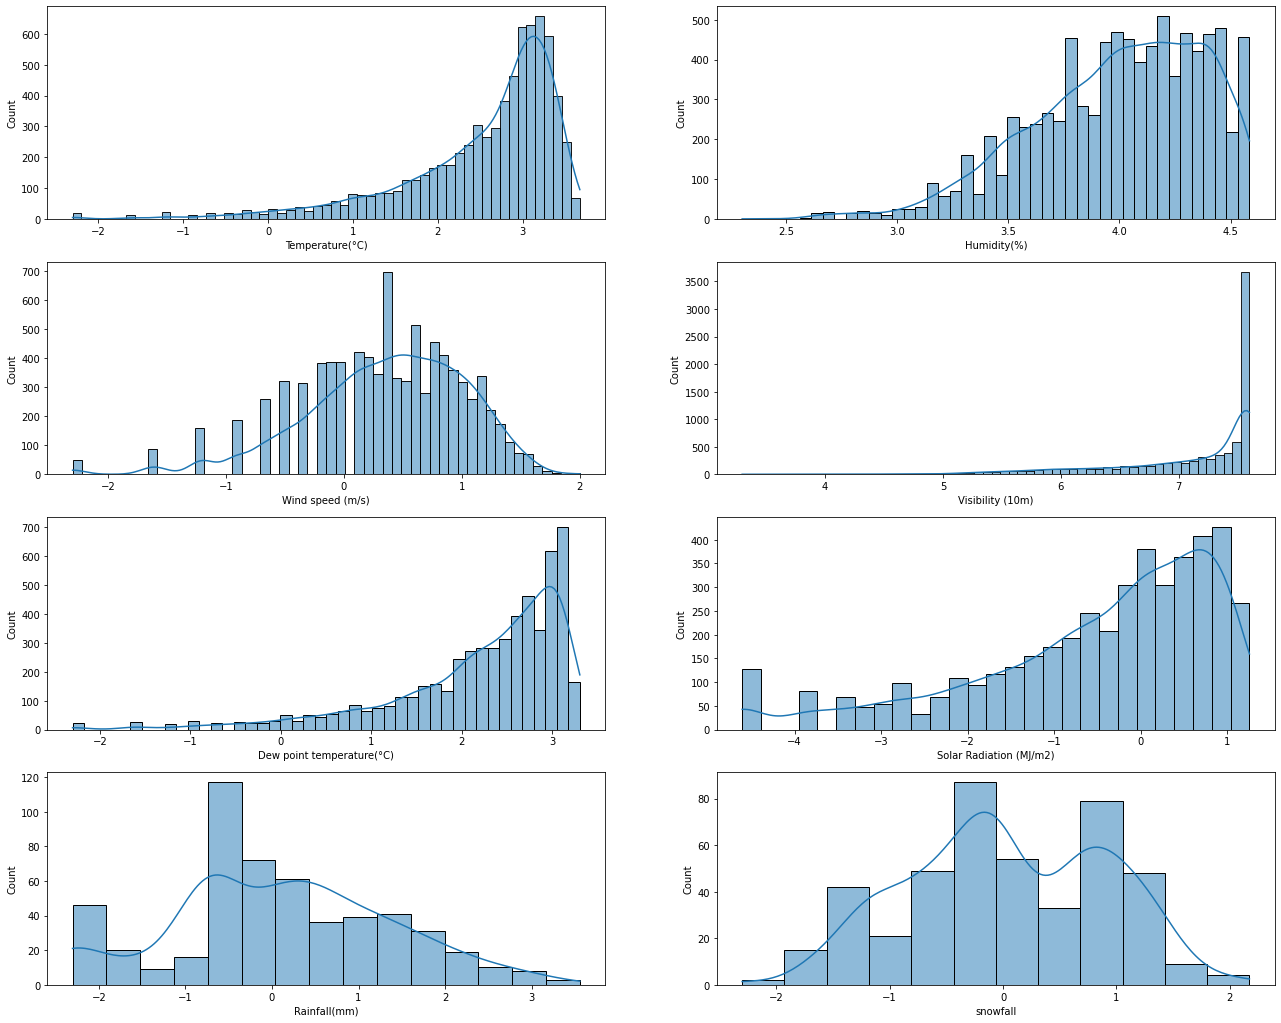

In [31]:
# Plot graph to see the distribution after log transformation

plt.figure(figsize=(22,18))

for num,col in enumerate(cont_cols):
    plt.subplot(4,2,num+1)
    sns.histplot(np.log(data[col]), kde=True)

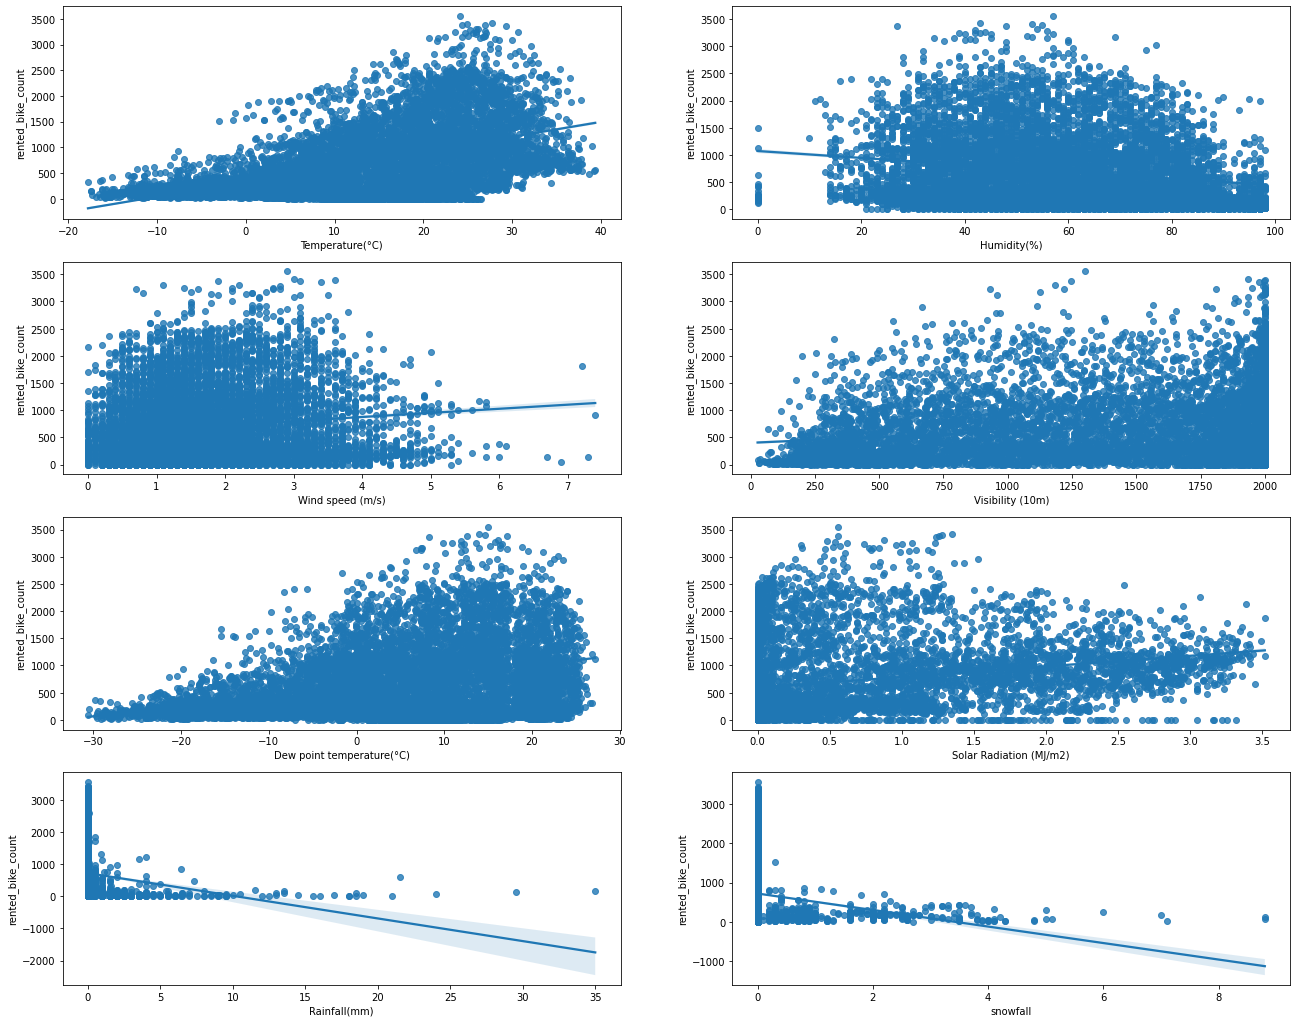

In [32]:
plt.figure(figsize=(22,18))

for num,col in enumerate(cont_cols):
    plt.subplot(4,2,num+1)
    sns.regplot(x=data[col],y=data['rented_bike_count'])


In [33]:
# creating a variable which contain all the values from dataset having zero rented count
no_rent_count = data[data['rented_bike_count']==0]

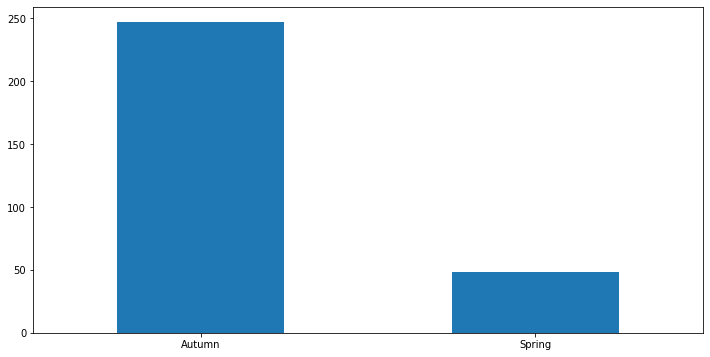

In [34]:
no_rent_count.Seasons.value_counts().plot(kind='bar', figsize=(12,6), rot=0)

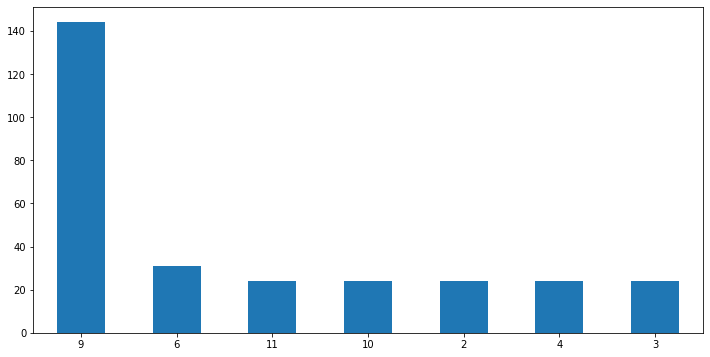

In [35]:
no_rent_count.date_month.value_counts().plot(kind='bar', figsize=(12,6), rot=0)

**Observations:**
- From the above graph we observe that in Autumn and Spring seasons zero rented count occured

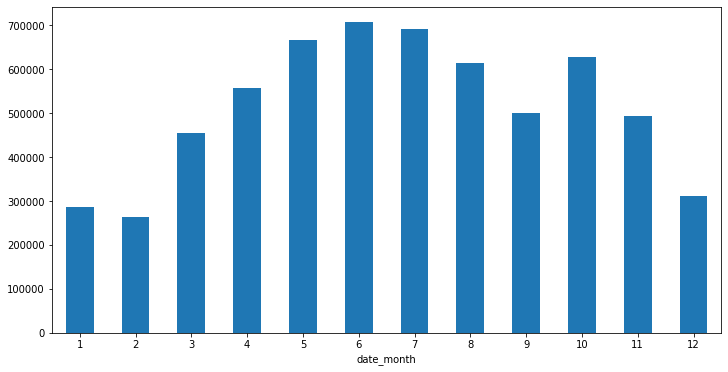

In [36]:
data.groupby('date_month').rented_bike_count.sum().plot(kind='bar', figsize=(12,6), rot=0)

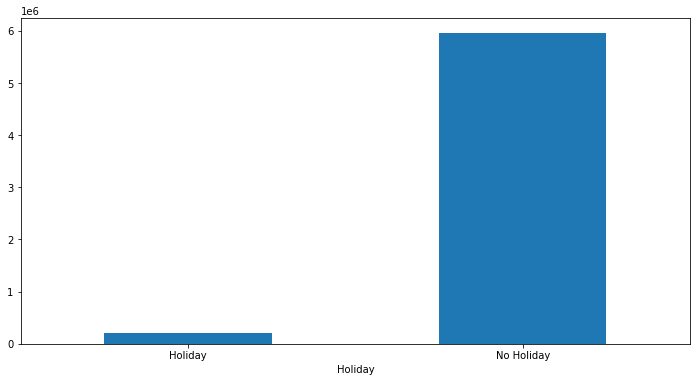

In [37]:
data.groupby('Holiday').rented_bike_count.sum().plot(kind='bar', figsize=(12,6), rot=0)

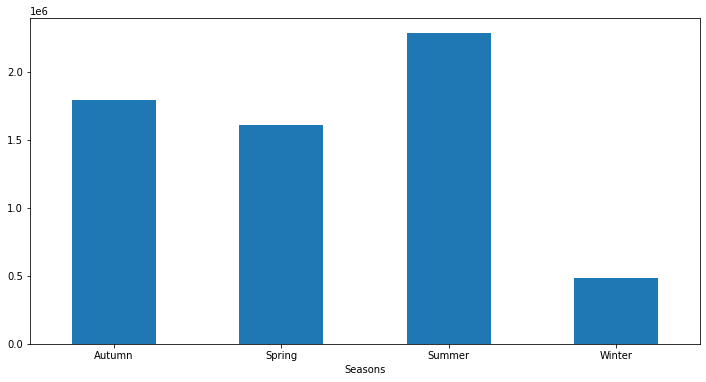

In [38]:
data.groupby('Seasons').rented_bike_count.sum().plot(kind='bar', figsize=(12,6), rot=0)

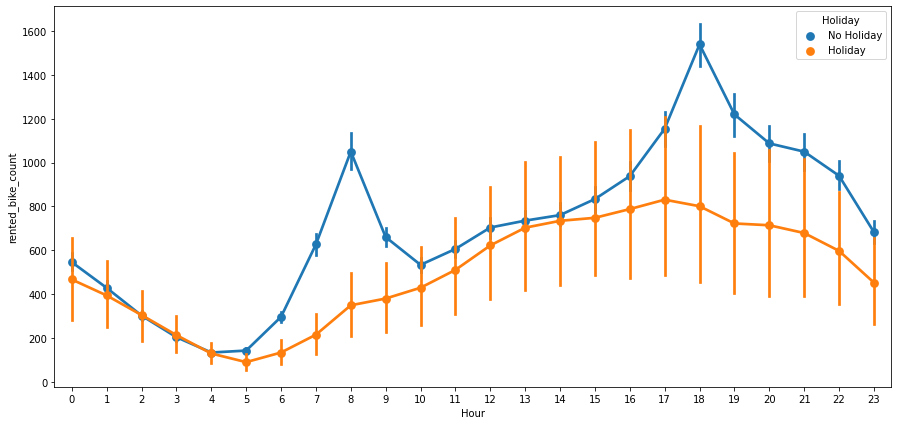

In [39]:
plt.figure(figsize=(15,7))
sns.pointplot(data=data, x="Hour", y="rented_bike_count", hue='Holiday')

Text(0.5, 1.0, "Month's Hourly Rented Count")

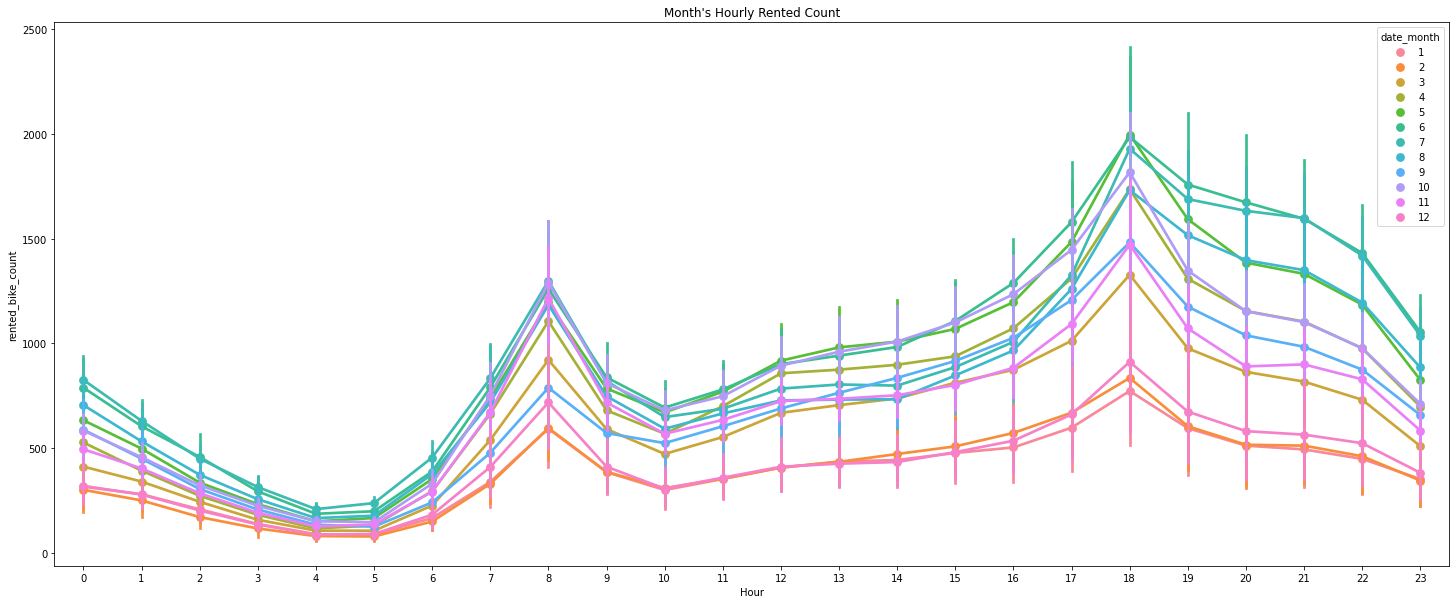

In [40]:
plt.figure(figsize=(25,10))
sns.pointplot(data=data, x="Hour", y="rented_bike_count", hue='date_month')
plt.title("Month's Hourly Rented Count")

**Observation:**
- From 3 am till 5 am we can say that this time bike rent count at it's minimum, however after 5 am it starts to surge and at 8 am it touches it's peak and after that it start to descend.

- Again rent count start increasing from 11 am and at 6 pm it can be observed that this is the time at every month rent count touches it's maximum.

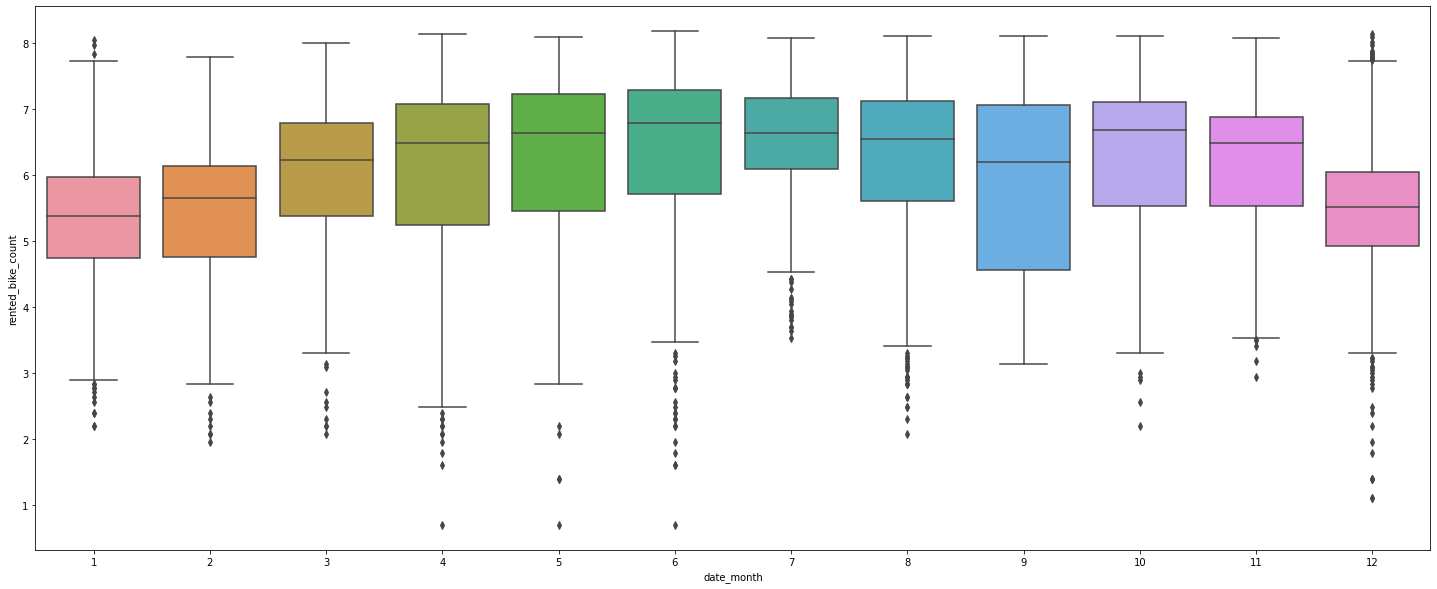

In [41]:
plt.figure(figsize=(25,10))
sns.boxplot(x=data['date_month'],y=np.log(data['rented_bike_count']))

In [42]:
#This is the right method
pd.cut(data.rented_bike_count,bins=np.arange(0,5,1)*1e3).value_counts()

(0.0, 1000.0]       6047
(1000.0, 2000.0]    1938
(2000.0, 3000.0]     449
(3000.0, 4000.0]      31
Name: rented_bike_count, dtype: int64

In [43]:
data['log_rent']=np.log(data['rented_bike_count'])

In [44]:
# Function to segregate data in categories

def binfunct(col, cut_point, labels=None):
    minval = col.min()
    maxval = col.max()
    break_point = [minval] + cut_point + [maxval]
    print(break_point)
    
    if not labels:
        labels = range(len(cut_point)+1)
    
    colbin = pd.cut(col, bins=break_point, labels=labels, include_lowest=True)
    return colbin

In [45]:
# Set cut point at which to segregate the temperature
cut_point = [25, 35]
labels = ['cold', 'normal', 'hot']
data['temp_category'] = binfunct(data['Temperature(°C)'], cut_point, labels)

[-17.8, 25, 35, 39.4]


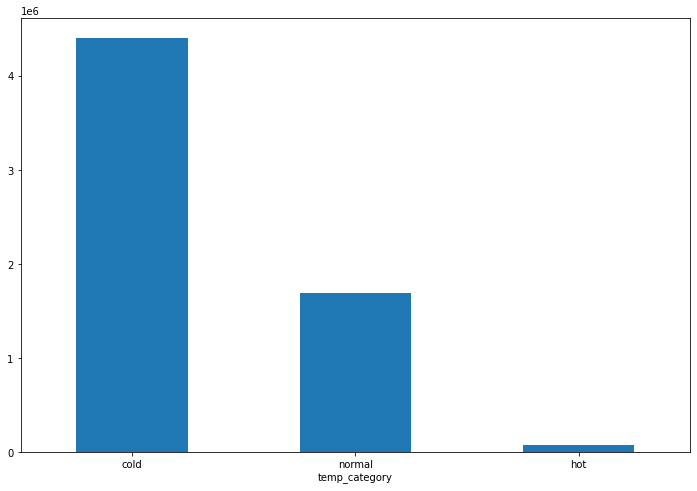

In [46]:
# To check the count of temperature type after binning
data.groupby('temp_category').rented_bike_count.sum().plot(kind='bar', figsize=(12,8), rot=0)

In [47]:
data.drop('log_rent', axis=1, inplace=True)

## To check the multicolinearity

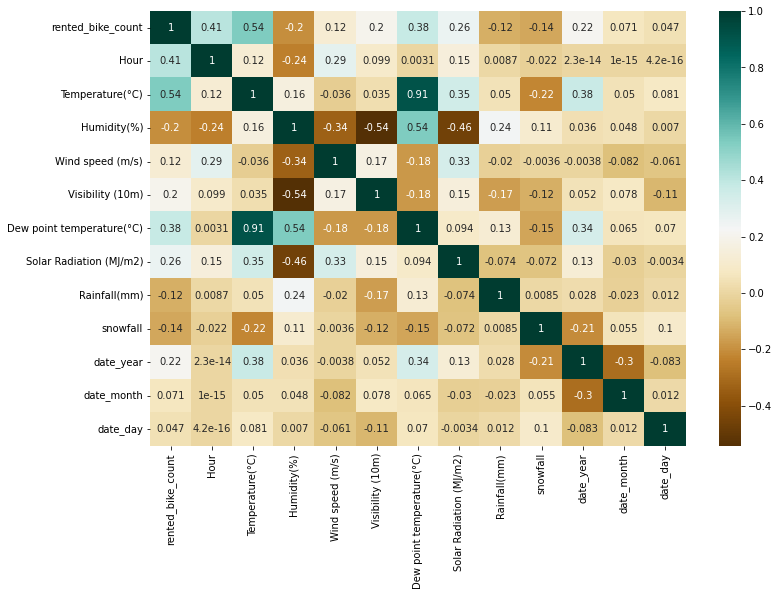

In [67]:
# Check multicolinearity with the help of heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='BrBG', annot=True)

**Observations:**
- Dew point temperature and temperature is highly correlated which is 0.91.
- Dew point temperature is also correlated with humidity which is 0.54

# Feature Engineering

In [49]:
X = data.drop('rented_bike_count', axis=1)
y = data.rented_bike_count
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),snowfall,Seasons,Holiday,Functioning Day,date_year,date_month,date_day,temp_category
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,cold
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,cold
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,cold
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,cold
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,cold


In [50]:
categories = data.describe(include='object')

In [51]:
cat_col = categories.columns
cat_col

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [52]:
data.date_year.value_counts()

2018    8016
2017     744
Name: date_year, dtype: int64

In [53]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [54]:
X = pd.get_dummies(X, columns=cat_col, drop_first=True)
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),snowfall,date_year,date_month,date_day,temp_category,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,12,cold,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,12,cold,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,12,cold,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,12,cold,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,12,cold,0,0,1,1,1


In [55]:
X.drop('temp_category', axis=1, inplace=True)
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),snowfall,date_year,date_month,date_day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [75]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [77]:
lr_pred_train = lr.predict(X_train)
dt_pred_train = dt.predict(X_train)
rf_pred_train = rf.predict(X_train)

In [78]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [79]:
print(f"R-Sqrd for Linear Reg on Train set: {r2_score(y_train, lr_pred_train)}")
print(f"R-Sqrd for Decision Tree on Train set: {r2_score(y_train, dt_pred_train)}")
print(f"R-Sqrd for RandomForest on Train set: {r2_score(y_train, rf_pred_train)}")

R-Sqrd for Linear Reg on Train set: 0.5487174288733023
R-Sqrd for Decision Tree on Train set: 1.0
R-Sqrd for RandomForest on Train set: 0.9830056838241276


In [80]:
print(f"R-Sqrd for Linear Reg on test set: {r2_score(y_test, lr_pred)}")
print(f"R-Sqrd for Decision Tree on test set: {r2_score(y_test, dt_pred)}")
print(f"R-Sqrd for RandomForest on test set: {r2_score(y_test, rf_pred)}")

R-Sqrd for Linear Reg on test set: 0.5622344712984315
R-Sqrd for Decision Tree on test set: 0.7320900971566249
R-Sqrd for RandomForest on test set: 0.8867400302517382


## Decision Tree With Gridsearch Hyperparameter Tuning

In [81]:
# Finding best parameters for decision tree
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

In [82]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
dt_pred = model.predict(X_test)
dt_pred_train = model.predict(X_train)

from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(dt_pred_train,y_train)
print('MSE for the train data:',mse_train)

mse_test=mean_squared_error(dt_pred,y_test)
print('MSE for the test data:',mse_test) # For decision tree

MSE for the train data: 46927.57057569156
MSE for the test data: 67025.71576678302


In [83]:
print(f"R-Sqrd for Decision Tree on train set: {r2_score(y_train, dt_pred_train)}")
print(f"R-Sqrd for Decision Tree on test set: {r2_score(y_test, dt_pred)}")

R-Sqrd for Decision Tree on train set: 0.8877916453148743
R-Sqrd for Decision Tree on test set: 0.8349359002396554


## Random Forest Gridsearch Hyperparameter tuning

In [84]:
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_

RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
rf_pred_train = model.predict(X_train)
rf_pred = model.predict(X_test)

rf_mse_train=mean_squared_error(rf_pred_train,y_train)
print('MSE for the train data:',rf_mse_train)

rf_mse=mean_squared_error(rf_pred,y_test)
print('MSE for the data:',rf_mse) # For random forest

MSE for the train data: 45675.02083260692
MSE for the data: 54336.6009252878


In [85]:
print(f"R-Sqrd for Randomforest on train set: {r2_score(y_train, rf_pred_train)}")
print(f"R-Sqrd for Randomforest on test set: {r2_score(y_test, rf_pred)}")

R-Sqrd for Decision Tree on train set: 0.8907866127531762
R-Sqrd for Decision Tree on test set: 0.8661853586617771


In [86]:
train_Adj_r2 = 1 - (1-r2_score(y_train, rf_pred_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print(f"Training Adjusted R-Squared: {train_Adj_r2}")

Training Adjusted R-Squared: 0.8905742325674983


In [87]:
test_Adj_r2 = 1 - (1-r2_score(y_test, rf_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print(f"Training Adjusted R-Squared: {test_Adj_r2}")

Training Adjusted R-Squared: 0.8659251380140135
